In [49]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [50]:
# 2. Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import *
from sklearn import metrics

In [52]:
df_dataset = pd.read_csv("drive/My Drive/Udemy Course NN for Beginners/House-Price.csv")#, sep ='\s+', header=None, names = columns)
df_dataset.head()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,0


In [53]:
df_dataset_y = df_dataset['Sold']

In [54]:
df_dataset = df_dataset.drop(labels = 'Sold', axis = 1)
df_dataset

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,NO,9.348,12.1792,Lake and River,27,YES,0.056006
502,20.6,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,YES,6.612,13.1648,Lake and River,20,YES,0.059903
503,23.9,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,NO,5.478,12.1912,None,31,YES,0.057572
504,22.0,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,YES,7.940,15.1760,None,47,YES,0.060694


In [55]:
df_dataset.isnull().sum()

price          0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hos_beds     8
n_hot_rooms    0
waterbody      0
rainfall       0
bus_ter        0
parks          0
dtype: int64

In [56]:
df_dataset_encoded = pd.get_dummies(df_dataset)

In [57]:
df_dataset_encoded = df_dataset_encoded.drop(labels=['airport_NO', 'waterbody_None'],axis=1)
df_dataset_encoded

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River,bus_ter_YES
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,5.480,11.1920,23,0.049347,1,0,0,1,1
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,7.332,12.1728,42,0.046146,0,1,0,0,1
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,7.394,101.1200,38,0.045764,0,0,0,0,1
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,9.268,11.2672,45,0.047151,1,1,0,0,1
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,8.824,11.2896,55,0.039474,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,9.348,12.1792,27,0.056006,0,0,1,0,1
502,20.6,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,6.612,13.1648,20,0.059903,1,0,1,0,1
503,23.9,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,5.478,12.1912,31,0.057572,0,0,0,0,1
504,22.0,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,7.940,15.1760,47,0.060694,1,0,0,0,1


In [58]:
df_dataset_encoded.n_hos_beds = df_dataset_encoded.n_hos_beds.fillna(df_dataset_encoded.n_hos_beds.mean())
df_dataset_encoded

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River,bus_ter_YES
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,5.480,11.1920,23,0.049347,1,0,0,1,1
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,7.332,12.1728,42,0.046146,0,1,0,0,1
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,7.394,101.1200,38,0.045764,0,0,0,0,1
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,9.268,11.2672,45,0.047151,1,1,0,0,1
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,8.824,11.2896,55,0.039474,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,9.348,12.1792,27,0.056006,0,0,1,0,1
502,20.6,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,6.612,13.1648,20,0.059903,1,0,1,0,1
503,23.9,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,5.478,12.1912,31,0.057572,0,0,0,0,1
504,22.0,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,7.940,15.1760,47,0.060694,1,0,0,0,1


In [59]:
df_dataset_encoded['avg_dist'] = (df_dataset_encoded.dist1+df_dataset_encoded.dist2+df_dataset_encoded.dist3+df_dataset_encoded.dist4)/4

In [60]:
del df_dataset_encoded['dist1']
del df_dataset_encoded['dist2']
del df_dataset_encoded['dist3']
del df_dataset_encoded['dist4']

In [61]:
del df_dataset_encoded['bus_ter_YES']

In [62]:
df_dataset_encoded.corr()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River,avg_dist
price,1.000000,-0.484754,-0.429300,0.696304,-0.377999,0.505655,-0.740836,0.108880,0.023122,-0.047426,-0.391574,0.182867,0.036233,-0.037497,0.071751,0.249289
resid_area,-0.484754,1.000000,0.763651,-0.391676,0.644779,-0.383248,0.603800,0.005799,-0.000839,0.055810,0.707635,-0.115401,-0.026590,0.051649,-0.098976,-0.708022
air_qual,-0.429300,0.763651,1.000000,-0.302188,0.731470,-0.188933,0.590879,-0.049553,-0.004882,0.092104,0.915544,-0.073903,-0.046393,0.013849,-0.037772,-0.769247
room_num,0.696304,-0.391676,-0.302188,1.000000,-0.240265,0.355501,-0.613808,0.032009,0.030674,-0.064694,-0.282817,0.163774,-0.004195,0.010554,0.046251,0.205241
age,-0.377999,0.644779,0.731470,-0.240265,1.000000,-0.261515,0.602339,-0.021012,0.009380,0.075198,0.673850,0.005101,0.003452,-0.004354,-0.088609,-0.747906
teachers,0.505655,-0.383248,-0.188933,0.355501,-0.261515,1.000000,-0.374044,-0.008056,-0.023343,-0.045836,-0.187004,0.069437,0.048717,-0.046981,0.094256,0.232452
poor_prop,-0.740836,0.603800,0.590879,-0.613808,0.602339,-0.374044,1.000000,-0.066008,0.003337,0.061581,0.552310,-0.095054,0.003197,0.020620,-0.109004,-0.496967
n_hos_beds,0.108880,0.005799,-0.049553,0.032009,-0.021012,-0.008056,-0.066008,1.000000,-0.005455,0.058628,-0.071272,-0.006365,0.042278,0.059482,-0.074148,-0.027871
n_hot_rooms,0.023122,-0.000839,-0.004882,0.030674,0.009380,-0.023343,0.003337,-0.005455,1.000000,-0.004840,0.006262,-0.066012,0.036442,-0.006133,-0.058431,-0.010177
rainfall,-0.047426,0.055810,0.092104,-0.064694,0.075198,-0.045836,0.061581,0.058628,-0.004840,1.000000,0.078641,-0.013581,-0.015918,0.109281,-0.036611,-0.037270


FROM ABOVE WE INFER THAT WE CAN DELETE THE COLUMN, PARKS


In [63]:
del df_dataset_encoded['parks']

In [64]:
df_dataset_encoded

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River,avg_dist
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.1920,23,1,0,0,1,4.0875
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.1728,42,0,1,0,0,4.9675
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,101.1200,38,0,0,0,0,4.9675
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.2672,45,1,1,0,0,6.0650
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.2896,55,0,1,0,0,6.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,41.93,0.573,6.593,69.1,19.0,9.67,9.348,12.1792,27,0,0,1,0,2.4775
502,20.6,41.93,0.573,6.120,76.7,19.0,9.08,6.612,13.1648,20,1,0,1,0,2.2875
503,23.9,41.93,0.573,6.976,91.0,19.0,5.64,5.478,12.1912,31,0,0,0,0,2.1675
504,22.0,41.93,0.573,6.794,89.3,19.0,6.48,7.940,15.1760,47,1,0,0,0,2.3900


In [65]:
x_train_final, x_test_final,y_train_final, y_test_final = train_test_split(df_dataset_encoded,df_dataset_y,test_size = 0.2)

In [66]:
sc = StandardScaler()
x_train_final = sc.fit_transform(x_train_final)
x_test_final = sc.fit_transform(x_test_final)

In [67]:
x_train_final = pd.DataFrame(x_train_final)
x_test_final = pd.DataFrame(x_test_final)

Text(0, 0.5, 'Cumulative explained variance')

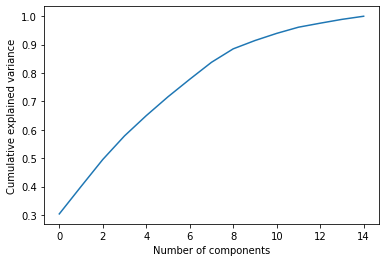

In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
pca.fit_transform(x_train_final)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

#SEQUENTIAL NEURAL NETWORK

In [69]:
import tensorflow as tf
import keras
from keras.layers import Dropout

In [70]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(50, activation='relu', input_dim = 15))
# model.add(Dropout(0.25))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))


In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 50)                800       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


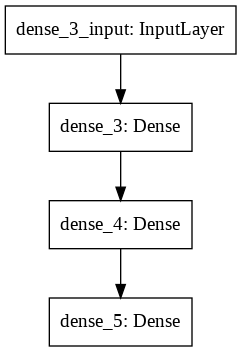

In [72]:
import pydoc
keras.utils.plot_model(model)

In [73]:
model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])
es = EarlyStopping(monitor='val_accuracy', mode='auto', restore_best_weights=True, verbose=1, patience=10)

In [74]:
model_history = model.fit(x_train_final, y_train_final, verbose=2, epochs = 30, batch_size = 8, validation_split=0.2, callbacks=[es])

Epoch 1/30
41/41 - 1s - loss: 0.7761 - accuracy: 0.4737 - val_loss: 0.6816 - val_accuracy: 0.5802
Epoch 2/30
41/41 - 0s - loss: 0.6941 - accuracy: 0.5356 - val_loss: 0.6596 - val_accuracy: 0.6543
Epoch 3/30
41/41 - 0s - loss: 0.6709 - accuracy: 0.5913 - val_loss: 0.6475 - val_accuracy: 0.6049
Epoch 4/30
41/41 - 0s - loss: 0.6531 - accuracy: 0.6161 - val_loss: 0.6392 - val_accuracy: 0.6296
Epoch 5/30
41/41 - 0s - loss: 0.6381 - accuracy: 0.6378 - val_loss: 0.6288 - val_accuracy: 0.6667
Epoch 6/30
41/41 - 0s - loss: 0.6244 - accuracy: 0.6842 - val_loss: 0.6172 - val_accuracy: 0.7037
Epoch 7/30
41/41 - 0s - loss: 0.6098 - accuracy: 0.6904 - val_loss: 0.6103 - val_accuracy: 0.6790
Epoch 8/30
41/41 - 0s - loss: 0.5975 - accuracy: 0.7059 - val_loss: 0.6003 - val_accuracy: 0.6790
Epoch 9/30
41/41 - 0s - loss: 0.5860 - accuracy: 0.7059 - val_loss: 0.5953 - val_accuracy: 0.6914
Epoch 10/30
41/41 - 0s - loss: 0.5776 - accuracy: 0.6966 - val_loss: 0.5911 - val_accuracy: 0.6914
Epoch 11/30
41/41 -

In [41]:

# del model

In [42]:
# keras.backend.clear_session()

In [75]:
y_pred = model.predict_classes(x_test_final)
print(metrics.accuracy_score(y_test_final, y_pred))

0.6176470588235294


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


#SVM

In [76]:
from sklearn import svm
from sklearn import metrics

In [77]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train_final, y_train_final)

#Predict the response for test dataset
y_pred = clf.predict(x_test_final)

In [80]:
print("Accuracy:",metrics.accuracy_score(y_test_final, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_final, y_pred,average=None))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_final, y_pred,average=None))



Accuracy: 0.6470588235294118
Precision: [0.72727273 0.55319149]
Recall: [0.6557377  0.63414634]


In [81]:
from sklearn.metrics import plot_confusion_matrix

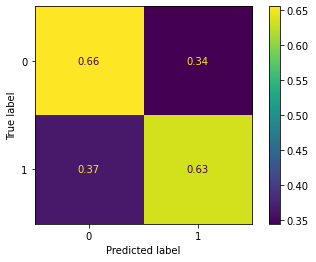

In [85]:
plot_confusion_matrix(clf, x_test_final, y_test_final,normalize='true')